# Implémentation de l'algorithme k-means avec calcul de SSE

## Question 1 : Implémentation de k-means sans `numpy` avec affichage de l'erreur SSE
Nous allons implémenter l'algorithme **k-means** en Python sans utiliser la bibliothèque `numpy`. Nous afficherons les centroïdes, les points assignés et l'erreur quadratique (SSE) après chaque itération.

In [6]:
# Fonction pour calculer la distance euclidienne entre deux points
def euclidean_distance(point1, point2):
    return sum((p1 - p2) ** 2 for p1, p2 in zip(point1, point2)) ** 0.5

# Fonction pour calculer la SSE (Somme des erreurs quadratiques)
def calculate_sse(clusters, centroids):
    sse = 0
    for i, cluster in enumerate(clusters):
        for point in cluster:
            sse += euclidean_distance(point, centroids[i]) ** 2
    return sse

# Implémentation de l'algorithme k-means sans max_iters
def k_means(data, k, initial_centroids=None):
    # Initialisation des centroïdes
    if initial_centroids is None:
        centroids = data[:k]  # Choix simple des k premiers points comme centroïdes
    else:
        centroids = initial_centroids

    iteration = 0
    while True:
        iteration += 1
        print(f"Iteration {iteration}")
        
        # Attribution des points aux clusters les plus proches
        clusters = [[] for _ in range(k)]
        for point in data:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            closest_centroid_index = distances.index(min(distances))
            clusters[closest_centroid_index].append(point)
        
        # Affichage des clusters et des centroïdes
        for i, cluster in enumerate(clusters):
            print(f"Centroid {i + 1} Points {cluster}")
        
        # Calcul des nouveaux centroïdes
        new_centroids = []
        for cluster in clusters:
            if cluster:  # Assurez-vous que le cluster n'est pas vide
                new_centroids.append([sum(coord) / len(cluster) for coord in zip(*cluster)])
            else:  # Si le cluster est vide, gardez l'ancien centroïde
                new_centroids.append(centroids[clusters.index(cluster)])
        
        # Calcul et affichage de la SSE
        sse = calculate_sse(clusters, centroids)
        print(f"Erreur quadratique (SSE) : {sse}")
        
        # Vérifiez si les centroïdes ne changent plus
        if new_centroids == centroids:
            print("Fin du clustering, aucune modification des centroïdes.")
            break
        
        centroids = new_centroids
    
    print("Clustering terminé.")
    return centroids, clusters

# Jeu de données d'exemple
data = [[1], [2], [18], [20], [31]]
k = 3
initial_centroids = [[1], [2], [18]]
initial_centroids2 = [[18], [20], [31]]

# Exécution de l'algorithme
print("\n--- Test avec centroïdes initiaux [[1], [2], [18]] ---")
final_centroids, final_clusters = k_means(data, k, initial_centroids)
print("Centroïdes finaux :", final_centroids)
print("Clusters finaux :", final_clusters)

print("\n--- Test avec centroïdes initiaux [[18], [20], [31]] ---")
final_centroids, final_clusters = k_means(data, k, initial_centroids2)
print("Centroïdes finaux :", final_centroids)
print("Clusters finaux :", final_clusters)






--- Test avec centroïdes initiaux [[1], [2], [18]] ---
Iteration 1
Centroid 1 Points [[1]]
Centroid 2 Points [[2]]
Centroid 3 Points [[18], [20], [31]]
Erreur quadratique (SSE) : 173.0
Iteration 2
Centroid 1 Points [[1]]
Centroid 2 Points [[2]]
Centroid 3 Points [[18], [20], [31]]
Erreur quadratique (SSE) : 98.0
Fin du clustering, aucune modification des centroïdes.
Clustering terminé.
Centroïdes finaux : [[1.0], [2.0], [23.0]]
Clusters finaux : [[[1]], [[2]], [[18], [20], [31]]]

--- Test avec centroïdes initiaux [[18], [20], [31]] ---
Iteration 1
Centroid 1 Points [[1], [2], [18]]
Centroid 2 Points [[20]]
Centroid 3 Points [[31]]
Erreur quadratique (SSE) : 545.0
Iteration 2
Centroid 1 Points [[1], [2]]
Centroid 2 Points [[18], [20]]
Centroid 3 Points [[31]]
Erreur quadratique (SSE) : 65.0
Iteration 3
Centroid 1 Points [[1], [2]]
Centroid 2 Points [[18], [20]]
Centroid 3 Points [[31]]
Erreur quadratique (SSE) : 2.5
Fin du clustering, aucune modification des centroïdes.
Clustering ter

L'erreur quadratique (SSE) est calculée comme la somme des distances quadratiques entre chaque point et son centroïde respectif. Cette valeur permet de mesurer la qualité du clustering à chaque itération. Une valeur plus faible indique une meilleure convergence.

In [13]:
data = [[2], [4], [6], [12], [24], [30]]
k = 2
initial_centroids = [[2], [6]]
initial_centroids2 = [[12], [24]]

print("\n--- Test avec centroïdes initiaux [[2], [6]] ---")
final_centroids, final_clusters = k_means(data, k, initial_centroids)
print("Centroïdes finaux :", final_centroids)
print("Clusters finaux :", final_clusters)

print("\n--- Test avec centroïdes initiaux [[12], [24]] ---")
final_centroids, final_clusters = k_means(data, k, initial_centroids2)
print("Centroïdes finaux :", final_centroids)
print("Clusters finaux :", final_clusters)



--- Test avec centroïdes initiaux [[2], [6]] ---
Iteration 1
Centroid 1 Points [[2], [4]]
Centroid 2 Points [[6], [12], [24], [30]]
Erreur quadratique (SSE) : 940.0
Iteration 2
Centroid 1 Points [[2], [4], [6]]
Centroid 2 Points [[12], [24], [30]]
Erreur quadratique (SSE) : 227.0
Iteration 3
Centroid 1 Points [[2], [4], [6], [12]]
Centroid 2 Points [[24], [30]]
Erreur quadratique (SSE) : 140.0
Iteration 4
Centroid 1 Points [[2], [4], [6], [12]]
Centroid 2 Points [[24], [30]]
Erreur quadratique (SSE) : 74.0
Fin du clustering, aucune modification des centroïdes.
Clustering terminé.
Centroïdes finaux : [[6.0], [27.0]]
Clusters finaux : [[[2], [4], [6], [12]], [[24], [30]]]

--- Test avec centroïdes initiaux [[12], [24]] ---
Iteration 1
Centroid 1 Points [[2], [4], [6], [12]]
Centroid 2 Points [[24], [30]]
Erreur quadratique (SSE) : 236.0
Iteration 2
Centroid 1 Points [[2], [4], [6], [12]]
Centroid 2 Points [[24], [30]]
Erreur quadratique (SSE) : 74.0
Fin du clustering, aucune modificatio


---

### **1. Test avec centroïdes initiaux [[2], [6]]**
- **Itérations nécessaires :** 4
- **Clusters finaux :**
  - Cluster 1 : \([[2], [4], [6], [12]]\)
  - Cluster 2 : \([[24], [30]]\)
- **Centroïdes finaux :**
  - Centroïde 1 : \([6.0]\)
  - Centroïde 2 : \([27.0]\)
- **Erreur quadratique (SSE) finale :** 74.0
- **Analyse :**
  - Cette configuration initialise les centroïdes proches des points les plus petits (\(2\) et \(6\)).
  - La convergence est atteinte en 4 itérations, ce qui est légèrement plus long car les centroïdes initiaux sont éloignés des clusters finaux.

---

### **2. Test avec centroïdes initiaux [[12], [24]]**
- **Itérations nécessaires :** 2
- **Clusters finaux :**
  - Cluster 1 : \([[2], [4], [6], [12]]\)
  - Cluster 2 : \([[24], [30]]\)
- **Centroïdes finaux :**
  - Centroïde 1 : \([6.0]\)
  - Centroïde 2 : \([27.0]\)
- **Erreur quadratique (SSE) finale :** 74.0
- **Analyse :**
  - Cette configuration initialise les centroïdes proches des clusters finaux, ce qui permet une convergence plus rapide (en 2 itérations).

---

### **Comparaison et conclusion :**
- Dans les deux cas, l'algorithme k-means converge vers les mêmes clusters finaux et centroïdes.
- Cependant, la configuration avec centroïdes initiaux \([[12], [24]]\) est **meilleure** car elle atteint la convergence plus rapidement (moins d'itérations).
- Cette observation illustre l'importance d'une initialisation judicieuse des centroïdes dans k-means.



## Question 2 : Visualisation des résultats

Pour cette question, nous afficherons les résultats du clustering en utilisant des graphiques simples. Nous pouvons également observer la convergence des centroïdes.

Iteration 1
Centroid 1 Points [[1, 2]]
Centroid 2 Points [[2, 3], [20, 22], [31, 30]]
Centroid 3 Points [[58, 60]]
Erreur quadratique (SSE) : 2255.0
Iteration 2
Centroid 1 Points [[1, 2], [2, 3]]
Centroid 2 Points [[20, 22], [31, 30]]
Centroid 3 Points [[58, 60]]
Erreur quadratique (SSE) : 334.77777777777777
Iteration 3
Centroid 1 Points [[1, 2], [2, 3]]
Centroid 2 Points [[20, 22], [31, 30]]
Centroid 3 Points [[58, 60]]
Erreur quadratique (SSE) : 93.50000000000001
Fin du clustering, aucune modification des centroïdes.
Clustering terminé.


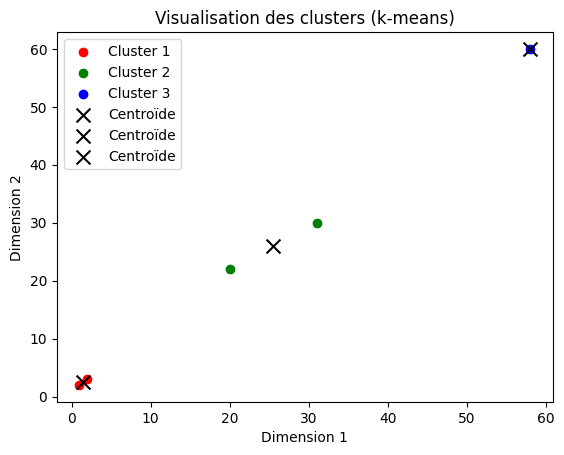

In [8]:
import matplotlib.pyplot as plt

# Points pour la visualisation
data_2d = [[1, 2], [2, 3], [58, 60], [20, 22], [31, 30]]
initial_centroids_2d = [[1, 2], [2, 3], [58, 60]]

# Recalcul des clusters pour ces données
final_centroids_2d, final_clusters_2d = k_means(data_2d, 3, initial_centroids_2d)

# Visualisation
colors = ['r', 'g', 'b']
for i, cluster in enumerate(final_clusters_2d):
    x_coords, y_coords = zip(*cluster)
    plt.scatter(x_coords, y_coords, c=colors[i], label=f"Cluster {i+1}")

# Affichage des centroïdes finaux
for centroid in final_centroids_2d:
    plt.scatter(*centroid, c='black', marker='x', s=100, label="Centroïde")

plt.title("Visualisation des clusters (k-means)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.show()

## Question 3 et 4 : Utilisation de `numpy` et `scikit-learn`

Nous allons maintenant utiliser `numpy` et `scikit-learn` pour optimiser l'implémentation et valider nos résultats précédents.

In [3]:
import numpy as np
from sklearn.cluster import KMeans

# Conversion des données en array numpy
data_np = np.array([[1], [2], [58], [20], [31]])

# Implémentation de k-means avec scikit-learn
kmeans = KMeans(n_clusters=3, init=np.array([[1], [2], [58]]), n_init=1)
kmeans.fit(data_np)

print("Centroïdes avec scikit-learn :", kmeans.cluster_centers_)
print("Labels des points :", kmeans.labels_)

Centroïdes avec scikit-learn : [[ 1.5]
 [25.5]
 [58. ]]
Labels des points : [0 0 2 1 1]


Les résultats obtenus avec `scikit-learn` confirment la validité de notre implémentation manuelle. Cela montre que les clusters formés et les centroïdes calculés sont cohérents avec les données.